%%latex

# Zovšeobecnené signály

## Aproximácia $\delta$ - funkcie

Predpokladajme, že v jednoduchom obvode podľa obrázku budeme cez malý rezistor R nabijať kondenzátor C zo zdroja konštantného napätia s hodnotou V.

<img src="./img/rc_sw.png" width=400>

Prúd $i_R$ rezistorom po zopnutí spínača, za predpokladu že kondenzátor bol vybitý, je

\begin{equation}
i_R(t)=\begin{cases}0 & t < 0\\ \frac{V}{R}e^{-t/RC} & t \geq 0\end{cases}
\end{equation} 

Po ukončení prechodového deja je na kondenzátore napätie rovné napätiu zdroja, celkový elektrický náboj, ktorý je v kondenzátore je potom

\begin{equation}
Q = \int_{- \infty }^{ \infty } i_R(t) \, dt = C V
\end{equation}

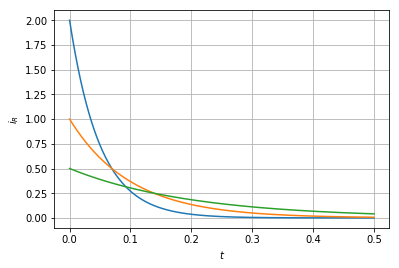

In [3]:
%reset -f  
%matplotlib inline
from scipy import *
import pylab as plt

# Simulacia priebehu prudu pri nabijani kondenzatora

R = [5,10,20]                  # [Ohm] parametre obvodu
C = 1e-2                       # [Farad]
V = 10                         # [Volt]
t = linspace(0, 0.5, 1000)     # [sec]
for r in R:
    plt.plot(t, V/r*exp(-t/(r*C)) )
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$i_R$')
plt.show()

Je zrejmé, že

\begin{equation}
 \lim_{R \rightarrow 0} i_R(t) =\begin{cases}0 & t \neq 0\\ \infty & t = 0\end{cases}
\end{equation} 

a výsledný náboj kondenzátora nezávisí od tvaru priebehu prúdu, ktorým sa kondenzátor nabil

\begin{equation}
 \lim_{R \rightarrow 0} \int_{- \infty }^{ \infty } i_R(t) \, dt = C \, V
\end{equation}

V limitnom prípade, ak sa doba nabíjania blíži k nule, hodnota prúdu narastá do nekonečna, plocha impulzu ale zostáva rovnaká, čo aproximuje vlastnosti $\delta$-funkcie (s multiplikatívnym faktorom $C \, V$)

Delta funkcia $\delta$ je zovšeobecnenou funkciou, ktorú zaviedol fyzik Paul Dirac. Vo fyzike reprezentuje hmotný bod, bodový náboj s konečnou hodnotou sústredené v jednom bode alebo impulz sily s definovanou hodnotou v krátkom časovom okamžiku.



## Matematická reprezentácia 

$\delta(t)$-funkciu môžeme definovať pomocou limitných operácií, tak ako to bolo ukázané v prdchádzajúcom príklade. Existuje veľké množstvo takýchto definícií $\delta(t)$-funkcie, vyberieme len niektoré

\begin{equation}
\delta(t) = \lim_{a \rightarrow \infty} a \, e^{-a t} \sigma(t)
\end{equation}

\begin{equation}
\delta(t) = \lim_{\xi \rightarrow 0} \frac{1} {\xi} \big[ \sigma \big( t+\frac{\xi}{2} -  \sigma \big( t-\frac{\xi}{2} \big) \big]
\end{equation}

\begin{equation}
\delta(t) = \lim_{n \rightarrow \infty} \sqrt{\frac {n}{2 \pi}} \, exp \left(-\frac{n t^2}{2} \right)
\end{equation}

\begin{equation}
\delta(t) = \lim_{n \rightarrow \infty} \frac{sin(nt)} {nt}
\end{equation}

$\delta$-funkciu môžeme definovať aj ako superpozíciu harmonických funkcií. Pomocou Fourierovej transformácie získame spektrálnu hustotu $\delta(t)$ funkcie, je zrejmé že táto je konštantná pre celý rozsah frekvenčného spektra

\begin{equation}
S_{\delta}(\omega) =  \int_{-\infty}^{\infty} e^{-j \omega t} \, \delta(t) \, dt = \left [ e^{-j \omega t} \right ] _{t=0} = 1
\end{equation}

Opačne preto vieme získať $\delta$-funkciu súčtom všetkých frekvenčných zložiek spektra, z fyzikálneho hľadiska sa na tento súčet môžeme pozerať ako na interferencia týchto zložiek s interferenčným maximom čase $t=0$.

\begin{equation}
\sigma(t) =  \frac{1}{2 \pi}\int_{-\infty}^{\infty} S_{\delta}(\omega) \, e^{-j \omega t}  \, d(\omega) = \frac{1}{2 \pi}\int_{-\infty}^{\infty} e^{-j \omega t}  \, d(\omega)
\end{equation}

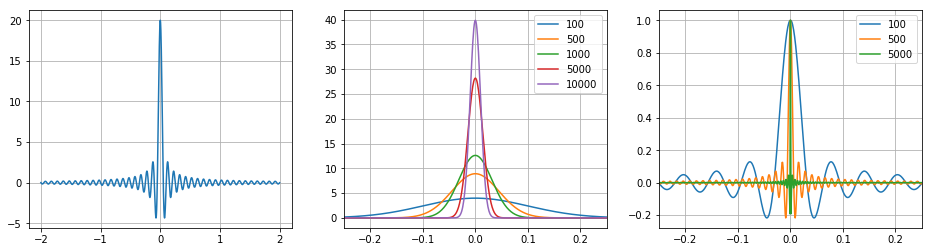

In [2]:
# Numericka simulacia roznych reprezentacii delta funkcie 

dt = 0.001
t = arange(-2.0, 2.0, dt)

s = zeros(len(t))                # 1. suctom zloziek spektra 
df = .01                         # rozlisenie spektralnych zloziek
for f in  arange(-10, 10, df):   # hranice sumacie 
    s = s + exp(2j*pi*f*t)*df    # sumacia harmonickych zloziek s krokom df 
s=real(s)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(131)            
plt.plot(t, s)             
plt.grid()

plt.subplot(132)                 # 2. limitnym vztahom exp(-x^2)
for n in [100, 500, 1000, 5000, 10000]:
    q = sqrt(n/(2*pi))*exp(-n*t**2/2)
    plt.plot(t, q, label=str(n)) 
plt.legend()
plt.xlim(-0.25, 0.25)
plt.grid()

plt.subplot(133)                 # 3. sin(x)/x
for n in [100, 500, 5000]:
    w = sin(n*t)/(n*t)
    plt.plot(t, w, label=str(n)) 
plt.legend()
plt.xlim(-0.25, 0.25)
plt.grid()
plt.show()

## Vlastnosti $\delta(t)$ funkcie

### Integrálne vlastnosti

\begin{equation}
\int_{-\infty}^{\infty} \delta(t) \, dt = 1
\end{equation}

\begin{equation}
\delta(a t)  = \frac{1}{| a |} \delta(t)
\end{equation}


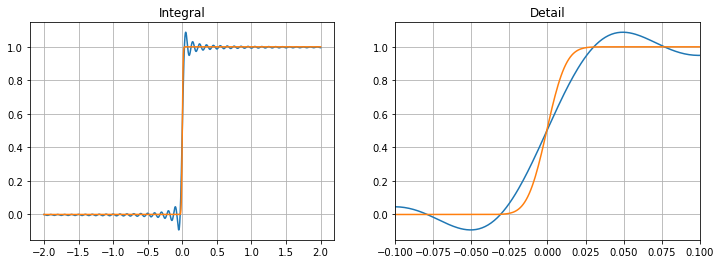

In [3]:
# Integral delta funkcie pre rozne aproximacie 
r1 = zeros(len(t))
r2 = zeros(len(t))

for i in range(1,len(t)):                # jednoducha integracia obdlznikom f(dt)*dt
    r1[i] = r1[i-1] + s[i]*dt            # integral spektralnej reprezentacie
    r2[i] = r2[i-1] + q[i]*dt            # integral exponencialnej reprezentacie

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)            
plt.plot(t, r1)
plt.plot(t, r2)
plt.title('Integral')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(t, r1)
plt.plot(t, r2)
plt.xlim(-0.1,0.1)
plt.title('Detail')
plt.grid()

plt.show()

### Filtračné vlastnosti

Pomocou filtračných vlastností $\delta(t)$ funkcie vieme reprezentovať v matematickom tvare nespojité signály, ako je napr. signál na výstupe vzorkovacieho obvodu.

\begin{equation}
s(t_0) = \int_{-\infty}^{\infty} s(t) \, \delta(t - t_0) \, dt 
\end{equation}

\begin{equation}
s(t) \, \delta(t) = s(0)  \, \delta(t)
\end{equation}

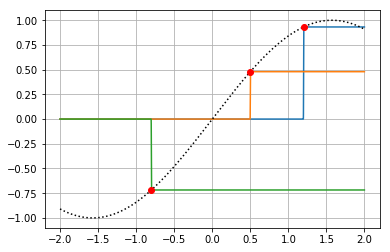

In [4]:
# Priklad vzorkovania harmonickeho signalu 
s = sin(t)                        # vstupny signal
t0 = array([-0.8, 0.5, 1.2])      # casove okamziky vzorkovania

n = 1e6                           # parameter simulovanej delta-funkcie 
for i in t0[::-1]:
    f = sqrt(n/(2*pi))*exp(-n*(t-i)**2/2)

    r = zeros(len(t))
    for i in range(1,len(t)):     # jednoducha integracia
        r[i] = r[i-1] + s[i]*f[i]*dt
    plt.plot(t, r)

plt.plot(t, s, 'k:')
plt.plot(t0, sin(t0), 'ro')
plt.grid()
plt.show()

### Posun $\delta$-funkcie v čase

Spektrálnu hustotu časovo posunutej delta funkcie určime jednoducho s využitím jej filtračných vlastností

\begin{equation}
S_{\delta}(\omega) =  \int_{-\infty}^{\infty} e^{-j \omega t} \, \delta(t - t_0) \, dt = \left [ e^{-j \omega t} e^{j \omega t_0} \right ] _{t=0} = 1 \,  e^{j \omega t_0} 
\end{equation}

Spektrálne zložky $\delta$-funkcie posunutej v čase o hodnotu $t_0$ majú zase amplitúdu rovnú 1, jednotlivé zložky sú ale fázovo posunuté o uhol $\phi = 2 \pi f t_0 = 2 \pi \frac{t_0}{T}$

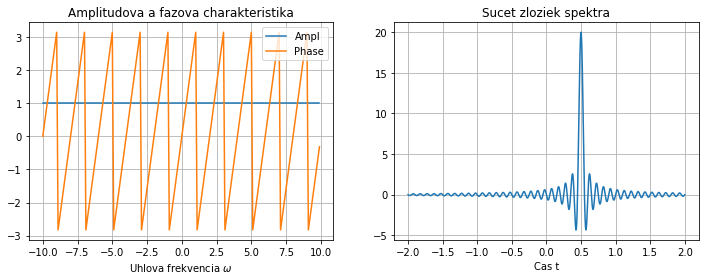

In [6]:
%reset -f  
%matplotlib inline
from scipy import *
import pylab as plt

# Numericka simulacia delta-funkcie posunutej v case 
t = arange(-2.0, 2.0, 0.001)           # casovy interval       
t0 = 0.5                               # posun v case 

x = zeros(len(t))                      # sucet spektralnych zloziek    
ampl = []
phase = []

omega=arange(-10, 10, 0.1)             # frekvencne zlozky
for f in omega  :                      # hranice sumacie cez frekvencne zlozky
    w = exp(-2j*pi*f*t)                # frekvencna zlozka
    p = exp(2j*pi*f*t0)                # fazovy uhol
    ampl.append(abs(p))                # amplituda zlozky
    phase.append(angle(p))             # faza zlozky
    x = x + p * w * 0.1                # sumacia harmonickych zloziek s krokom df             
x=real(x)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)            
plt.title('Amplitudova a fazova charakteristika')
plt.plot(omega, ampl, label='Ampl')
plt.plot(omega, phase, label = 'Phase')
plt.grid()
plt.xlabel('Uhlova frekvencia $\omega$')
plt.legend()

ax = fig.add_subplot(122)            
plt.title('Sucet zloziek spektra')
plt.plot(t,x)
plt.grid()
plt.xlabel('Cas t')

plt.show()

### Derivácia $\delta$-funkcie

Ak $f(t)$ je regulérna funkcia, potom z integračnej metódy *per-partes* vyplýva 

\begin{equation}
\int_{-\infty}^{\infty} \frac{d f(t)}{dt} \, s(t) dt = f(t) \, s(t) \big|_{-\infty}^{\infty} - \int_{-\infty}^{\infty} f(t) \, \frac{d s(t)}{dt} \, dt
\end{equation}

kde $s(t)$ je ľubovolná integrovateľná funkcia a zároveň platí $f(-\infty) \, s(-\infty) = f(\infty) \, s(\infty) = 0$, ak má integrál existovať. 

Ak namiesto $f(t)$ dosadíme $\delta(t)$, pravú strana môžeme upraviť ako 

\begin{equation}
-\int_{-\infty}^{\infty} f(t) \, \frac{d s(t)}{dt} \, dt \,\,\,\,  \rightarrow  \,\,\,\, - \int_{-\infty}^{\infty} \delta(t) \, \frac{d s(t)}{dt} \, dt = -s^{(1)}(0)
\end{equation}

kde $s^{(1)}(0)$ je označenie prvej derivácie $s(t)$ v bode $0$.

Potom definujme prvú deriváciu $\delta^{\, (1)}$-funkcie ako

\begin{equation}
\int_{-\infty}^{\infty} \delta^{\, (1)}(t) \, s(t) \, dt  = -s^{(1)}(0)
\end{equation}

Podobným postupom získame vzťah pre n-tú deriváciu

\begin{equation}
\int_{-\infty}^{\infty} \delta^{\, (n)}(t) \, s(t) \, dt  = (-1)^n \, s^{(n)}(0)
\end{equation}

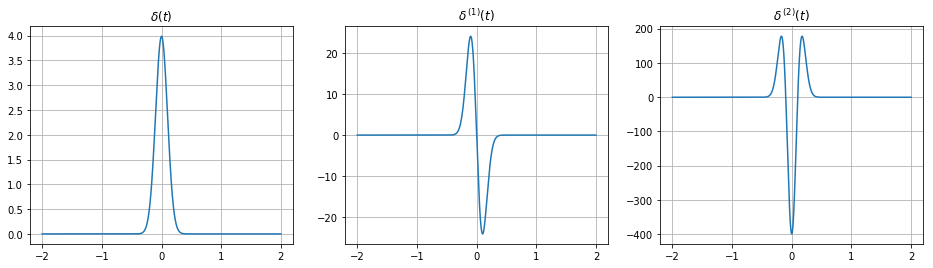

In [18]:
# Aproximacia prvej a druhej derivacie delta-funkcie 

t = arange(-2.0, 2.0, 0.001)
n = 100                               # parameter bell-funkcie

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(131)  
s = sqrt(n/(2*pi))*exp(-n*t**2/2)      # bell-funkcia, aproximacia delta-funkcie
plt.title(r'$\delta(t)$')
plt.plot(t, s)             
plt.grid()

plt.subplot(132)                       # prva derivacia
q = -(n*t)*sqrt(n/(2*pi))*exp(-n*t**2/2)
plt.title(r'$\delta^{\,(1)}(t)$')
plt.plot(t, q)
plt.grid()

plt.subplot(133)                       # druha derivacia
q = (-n)*sqrt(n/(2*pi))*exp(-n*t**2/2) + (n**2 * t**2)*sqrt(n/(2*pi))*exp(-n*t**2/2)
plt.title(r'$\delta^{\,(2)}(t)$')
plt.plot(t, q)
plt.grid()

plt.show()